<h1 style="color:blue; line-height:3; background:lightgreen; text-align:center">Custumers Segmentation Analysis Using Python</h1>

<h2 style="color:blue; line-height:2; background:pink; text-align:center">Problem Statement</h2>
<h3 style="color:gray">Classify Mall Customers according to there Gender, Age, Annual Income and Spending</h3>

<h2 style="color:blue; background:pink; line-height:1.5">Import Basic Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

<h2 style="color:blue; background:pink; line-height:1.5">Load Data</h2>

In [23]:
df=pd.read_csv('data/Mall_Customers_Segmentation.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h2 style="color:blue; background:pink; line-height:1.5">Understand Dataset</h2>

In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<h2 style="color:blue; background:pink; line-height:1.5">Missing Values</h2>

In [8]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<h2 style="color:blue; background:pink; line-height:1.5">Duplicate rows</h2>

In [9]:
df.duplicated().sum()

0

<h2 style="color:blue; background:pink; line-height:1.5">Statistical Information</h2>

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<h2 style="color:blue; background:pink; line-height:1.5">Exploratory Data Analysis</h2>

<h2 style="color:blue; background:lightgreen; line-height:1">1. Analyze Genre/Gender</h2>


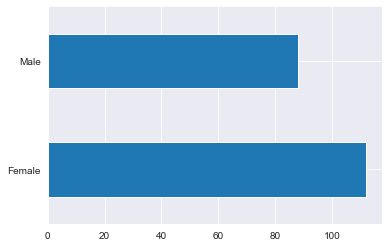

In [12]:
df['Gender'].value_counts().plot(kind='barh');

**<code style="color:red">Count of Female customer is higher than male customer</code>**

<h2 style="color:blue; background:lightgreen; line-height:1">2. Analyze Age</h2>

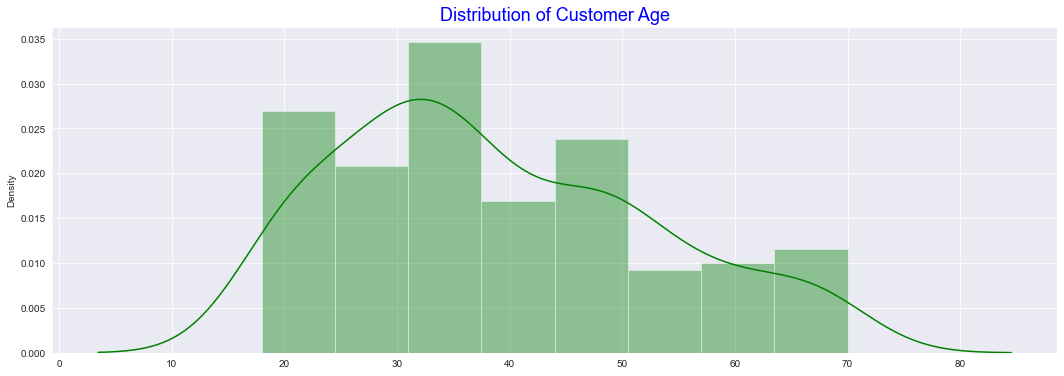

In [13]:
plt.figure(figsize=(18,6))
sns.distplot(x=df['Age'], color='green')
plt.title("Distribution of Customer Age", fontsize=18, color='blue');

**<code style="color:red">Count of Customers in age group 20 to 50 is high.</code>**

<h2 style="color:blue; background:lightgreen; line-height:1">3. Analyze Annual Income</h2>

In [14]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

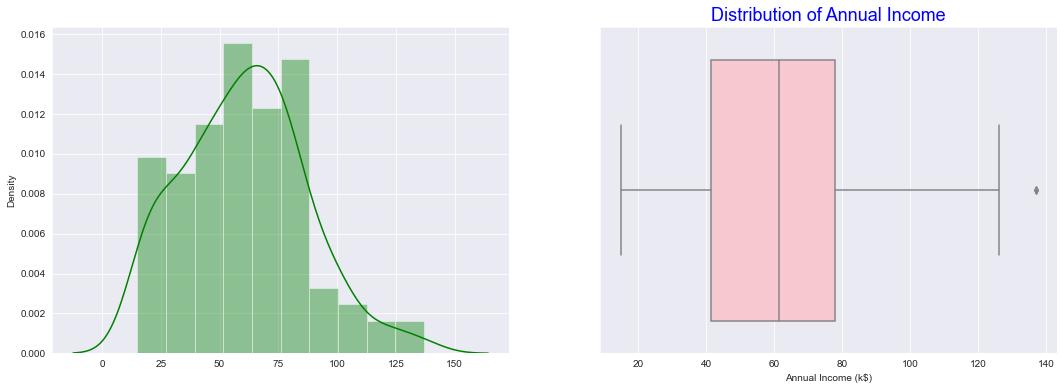

In [15]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.distplot(x=df['Annual Income (k$)'], color='green')

plt.subplot(122)
sns.boxplot(x=df['Annual Income (k$)'], color='pink')
plt.title("Distribution of Annual Income", fontsize=18, color='blue');

**<code style="color:red">One outlier in Annual income column. Remove this one data point</code>**

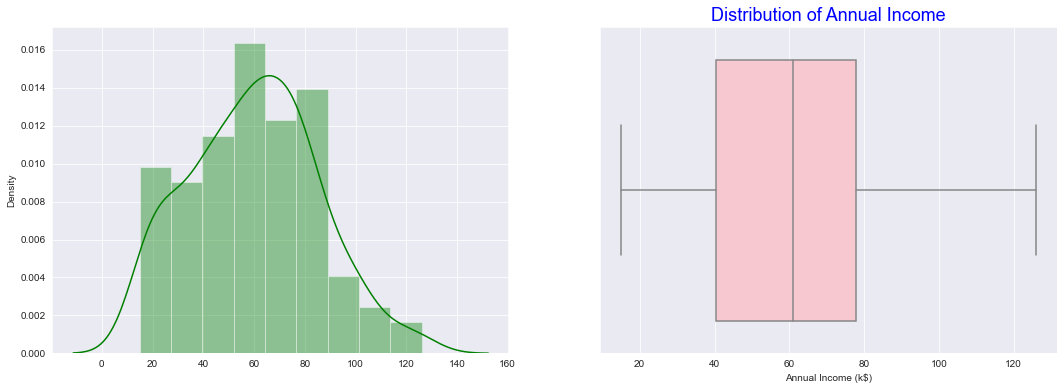

In [16]:
df=df[df['Annual Income (k$)']<130]

plt.figure(figsize=(18,6))
plt.subplot(121)
sns.distplot(x=df['Annual Income (k$)'], color='green')

plt.subplot(122)
sns.boxplot(x=df['Annual Income (k$)'], color='pink')
plt.title("Distribution of Annual Income", fontsize=18, color='blue');

<h2 style="color:blue; background:lightgreen; line-height:1">4. Analyze Spending Score</h2>

In [17]:
df['Spending Score (1-100)'].describe()

count    198.000000
mean      50.196970
std       25.746846
min        1.000000
25%       35.000000
50%       50.000000
75%       72.750000
max       99.000000
Name: Spending Score (1-100), dtype: float64

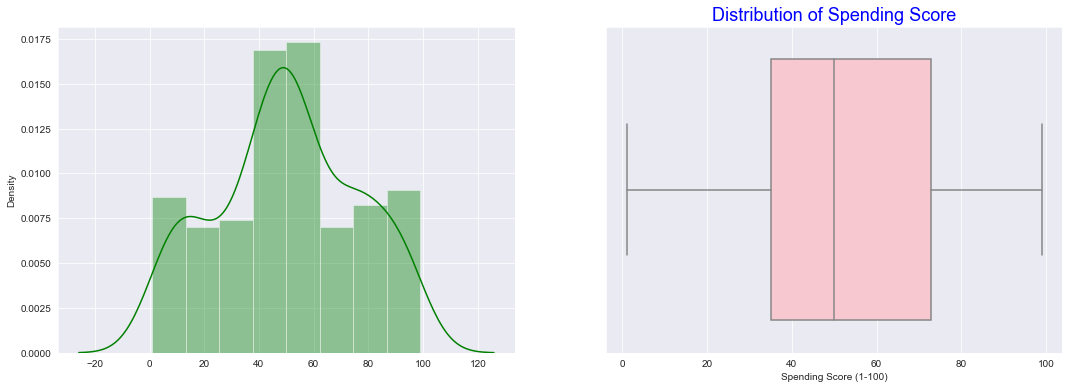

In [18]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.distplot(x=df['Spending Score (1-100)'], color='green')

plt.subplot(122)
sns.boxplot(x=df['Spending Score (1-100)'], color='pink')
plt.title("Distribution of Spending Score", fontsize=18, color='blue');

<h2 style="color:blue; background:lightgreen; line-height:1.5">5. Analysze Age vs Spending Score column</h2>

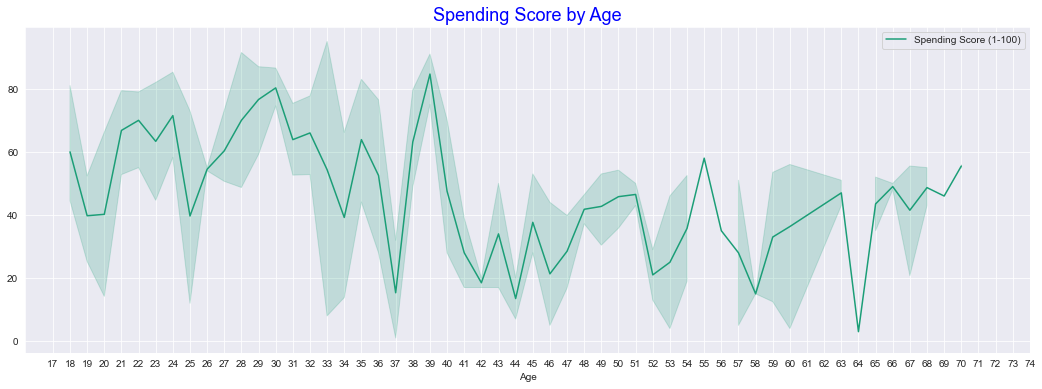

In [43]:
age_vs_spend=df[['Age', 'Spending Score (1-100)']]
age_vs_spend.set_index('Age', inplace=True)
plt.subplots(figsize=(18,6))
sns.lineplot(data=age_vs_spend, palette='Dark2')
plt.xticks(np.arange(17, 75, 1))
plt.title("Spending Score by Age", fontsize=18, color='blue');

**<code style="color:red">Spending Score is high at age 39.</code>**

<h2 style="color:blue; background:lightgreen; line-height:1.5">6. Analysze Age vs Annual income column</h2>

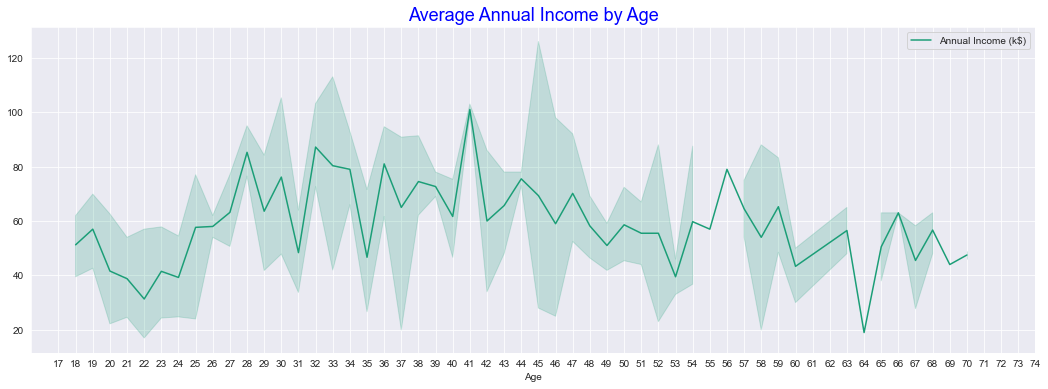

In [44]:
age_vs_income=df[['Age', 'Annual Income (k$)']]
age_vs_income.set_index('Age', inplace=True)
plt.subplots(figsize=(18,6))
sns.lineplot(data=age_vs_income, palette='Dark2')
plt.xticks(np.arange(17, 75, 1))
plt.title("Average Annual Income by Age", fontsize=18, color='blue');

**<code style="color:red">Average annual income is high at age 41.</code>**

<h2 style="color:blue; background:pink; line-height:1.5">Change Gender to Numeric</h2>

In [45]:
df['Gender']=np.where(df['Gender']=='Male', 1, 0)
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

<h2 style="color:blue; background:pink; line-height:1.5">Scale the features</h2>

In [46]:
data=df.drop('CustomerID', axis=1)

In [47]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
data=std_scaler.fit_transform(data)
data=pd.DataFrame(data, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [21]:
from sklearn.decomposition import PCA
pca=PCA(2)

In [22]:
data=pca.fit_transform(data)
data.shape

(198, 2)


<h2 style="color:blue; background:pink; line-height:1.5">Create Cluster of Customers</h2>

<h2 style="color:blue; background:lightgreen; line-height:1.2">1. Using Agglomerative Clustering</h2>

In [57]:
from sklearn.cluster import AgglomerativeClustering
aglo=AgglomerativeClustering(n_clusters=2)
aglo.fit(data)

AgglomerativeClustering()

In [58]:
label=aglo.fit_predict(data)
unique_labels=np.unique(label)
print("Unique Labels=", unique_labels)

Unique Labels= [0 1]


In [59]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, label, metric="sqeuclidean"))

Silhouette Coefficient: 0.443


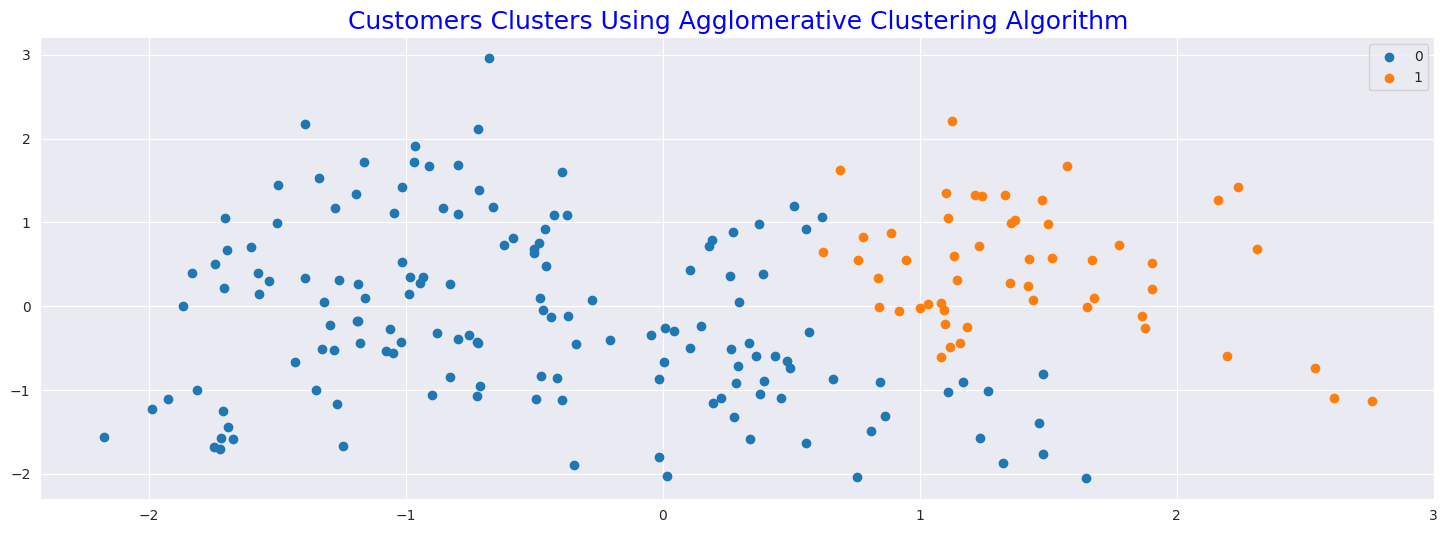

In [25]:
plt.figure(figsize=(18,6))
for i in unique_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    plt.title("Customers Clusters Using Agglomerative Clustering Algorithm", fontsize=18, color='blue');
plt.legend()
plt.show()

<h2 style="color:blue; background:lightgreen; line-height:1.2">2. Using Mini Batch Means Clustering</h2>

In [54]:
from sklearn.cluster import MiniBatchKMeans
mini=MiniBatchKMeans(n_clusters=2)
mini.fit(data)

MiniBatchKMeans(n_clusters=2)

In [55]:
label=mini.fit_predict(data)
unique_labels=np.unique(label)
centroids=mini.cluster_centers_
print("Unique Labels=", unique_labels)
print("Centroids=\n", centroids)

Unique Labels= [0 1]
Centroids=
 [[ 1.01094738  0.03103347]
 [-0.94930668 -0.05156606]]


In [56]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, label, metric="sqeuclidean"))

Silhouette Coefficient: 0.562


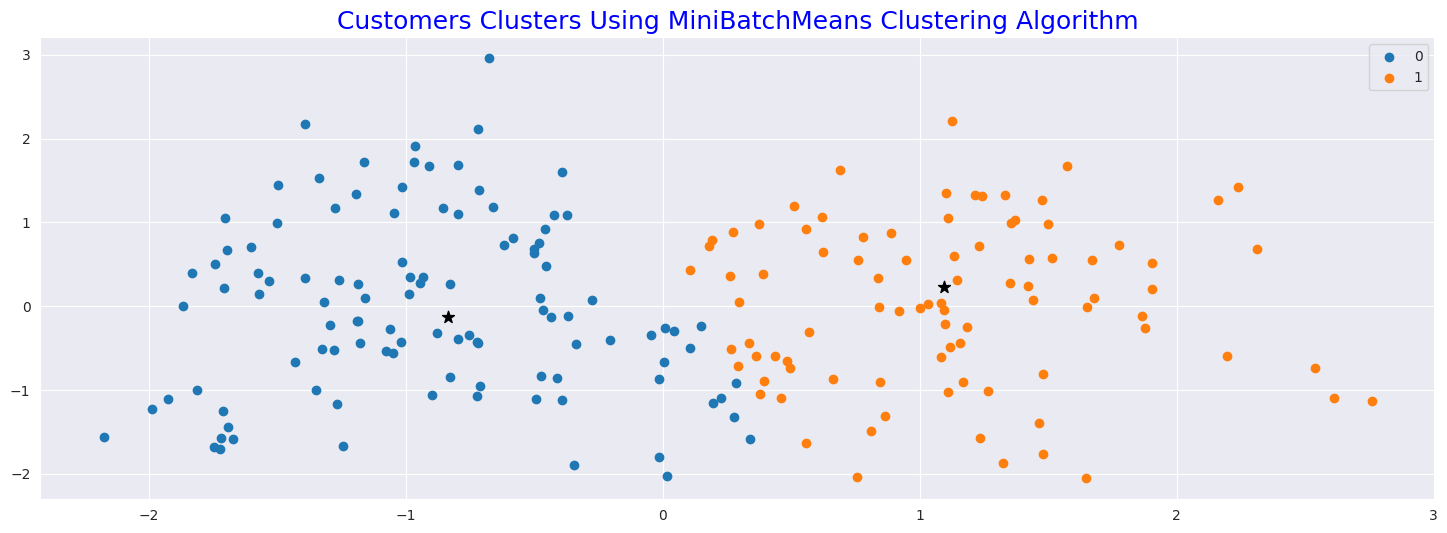

In [28]:
plt.figure(figsize=(18,6))
for i in unique_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    plt.title("Customers Clusters Using MiniBatchMeans Clustering Algorithm", fontsize=18, color='blue');
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='black', marker='*')
plt.legend()
plt.show()

<h2 style="color:blue; background:lightgreen; line-height:1.2">3. Using KMeans Clustering</h2>

In [51]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [52]:
label=kmeans.fit_predict(data)
unique_labels=np.unique(label)
centroids=kmeans.cluster_centers_
print("Unique Labels=", unique_labels)
print("Centroids=\n", centroids)

Unique Labels= [0 1]
Centroids=
 [[-1.05144724  0.11446024]
 [ 0.96978143 -0.10557012]]


In [53]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, label, metric="sqeuclidean"))

Silhouette Coefficient: 0.570


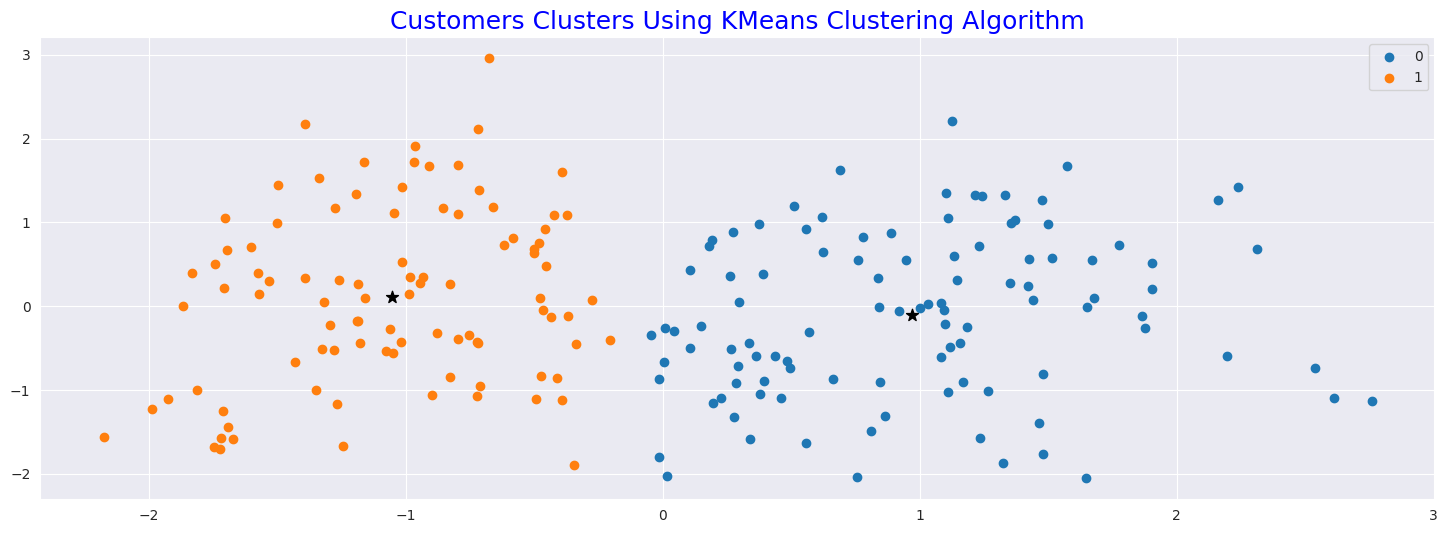

In [31]:
plt.figure(figsize=(18,6))
for i in unique_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    plt.title("Customers Clusters Using KMeans Clustering Algorithm", fontsize=18, color='blue');
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='black', marker='*')
plt.legend()
plt.show()

<h2 style="color:blue; background:pink; line-height:1">Best value of K using Elbo Method</h2>


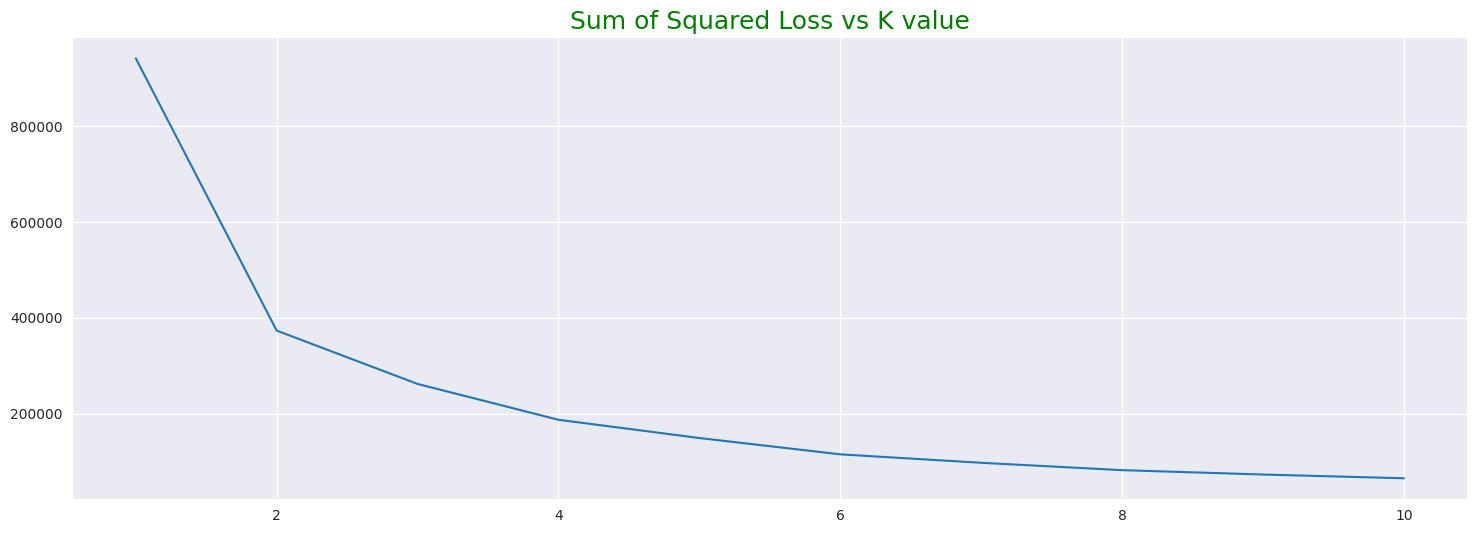

In [35]:
ssl=[]

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    ssl.append(clustering.inertia_)
    
k=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(18,6))
sns.lineplot(x=k, y=ssl);
plt.title("Sum of Squared Loss vs K value", fontsize=18, color='green');

**<code style="color:red">Our data have 2 clusters.</code>**

<h2 style="color:blue; background:lightgreen; line-height:1.2">4. Using Affinity Propagation Clustering</h2>


In [78]:
from sklearn.cluster import AffinityPropagation
aff=AffinityPropagation()
aff.fit(data)

AffinityPropagation()

In [79]:
n_clusters_=len(aff.cluster_centers_indices_)
print("Number of clusters=", n_clusters_)
label=aff.fit_predict(data)
unique_labels=np.unique(label)
centroids=aff.cluster_centers_
print("Unique Labels=", unique_labels)
print("Centroids=\n", centroids)

Number of clusters= 13
Unique Labels= [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Centroids=
 [[-1.69089844 -1.43911641]
 [ 2.53940632 -0.73386027]
 [ 1.23475346 -1.57637398]
 [-0.49112515 -1.10430704]
 [ 0.29412243 -0.71544826]
 [ 0.6230035   0.64157894]
 [-0.87871689 -0.32599297]
 [ 1.67120809  0.54789129]
 [-0.58399933  0.81850107]
 [ 1.18521485 -0.24455396]
 [-1.39079949  0.33307878]
 [ 1.33139587  1.32155997]
 [-0.96753827  1.71732144]]


In [80]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, label, metric="sqeuclidean"))

Silhouette Coefficient: 0.552


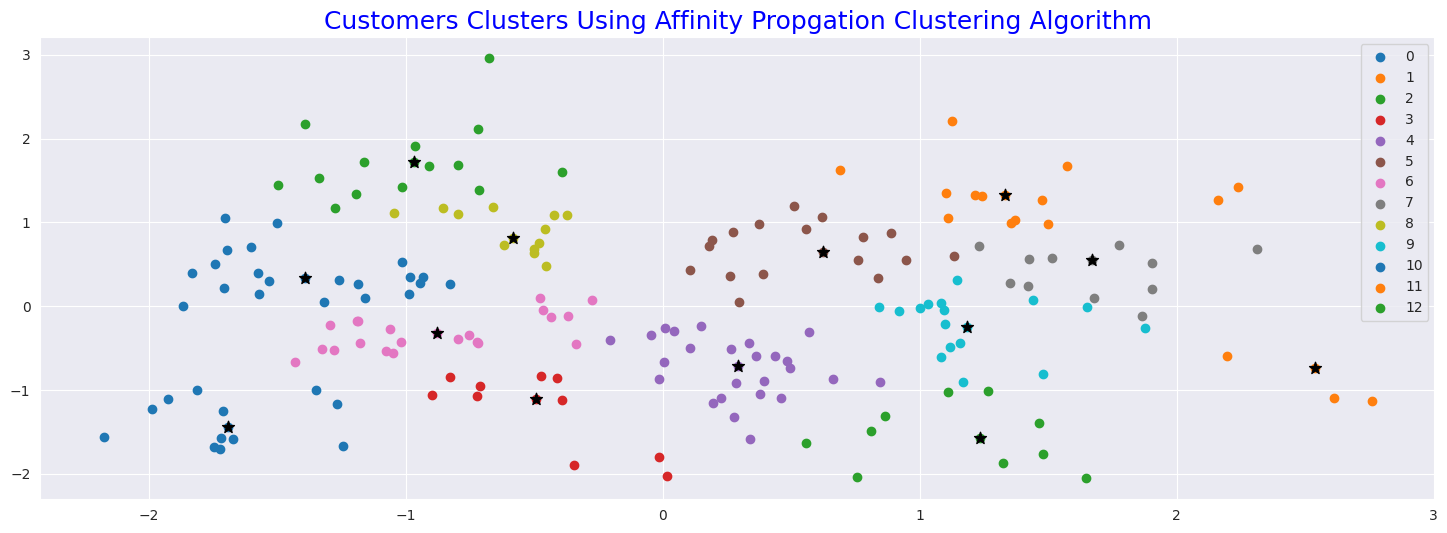

In [81]:
plt.figure(figsize=(18,6))
for i in unique_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    plt.title("Customers Clusters Using Affinity Propgation Clustering Algorithm", fontsize=18, color='blue');
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='black', marker='*')
plt.legend()
plt.show()

<h2 style="color:blue; background:lightgreen; line-height:1.2">5. Using Mean Shift Clustering</h2>

In [73]:
from sklearn.cluster import MeanShift
meanshift=MeanShift(bandwidth=2)
meanshift.fit(data)

MeanShift(bandwidth=2)

In [74]:
label=meanshift.fit_predict(data)
unique_labels=np.unique(label)
centroids=meanshift.cluster_centers_
print("Unique Labels=", unique_labels)
print("Centroids=\n", centroids)

Unique Labels= [0]
Centroids=
 [[-0.02381978  0.10586078]]


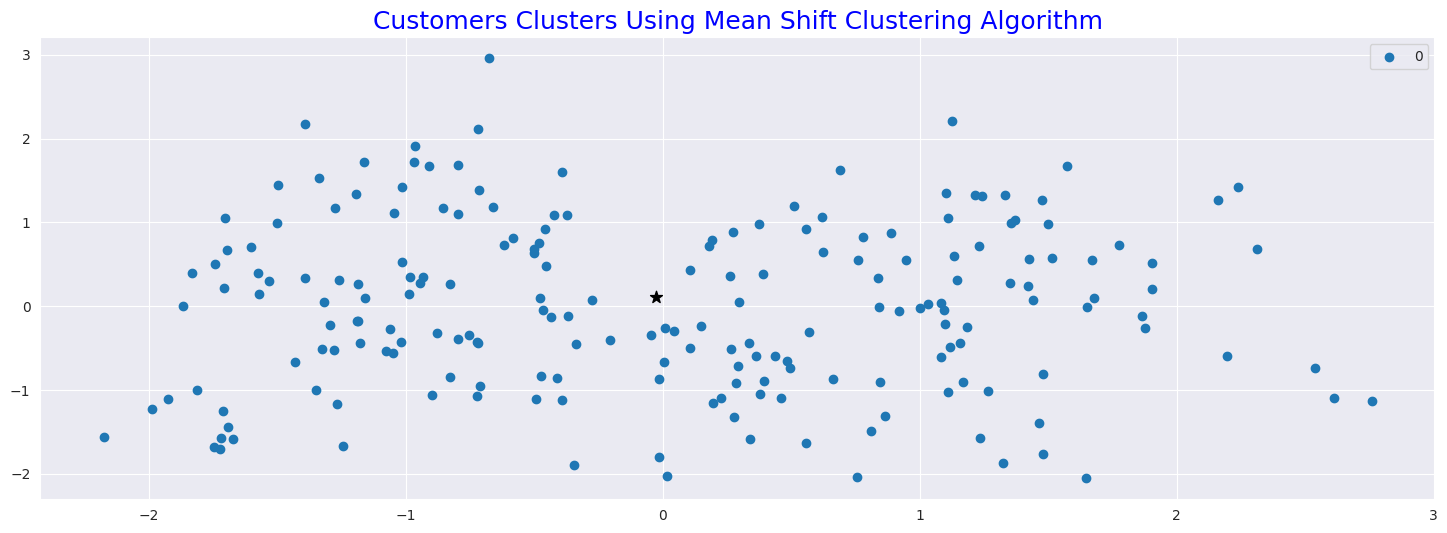

In [77]:
plt.figure(figsize=(18,6))
for i in unique_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    plt.title("Customers Clusters Using Mean Shift Clustering Algorithm", fontsize=18, color='blue');
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='black', marker='*')
plt.legend()
plt.show()